## Dependencias

In [ ]:
%pip install -r requirements.txt

In [2]:
import os
import sys
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly_resampler import FigureResampler
from tqdm.auto import tqdm

In [3]:
%cd src
from data import load_signals, load_annotations, annotation_to_30s_labels
%cd ..

c:\Users\ahmat\Documents\_ITBA\5to\1er Cuatrimestre\Neuro\sleep-linear\src
c:\Users\ahmat\Documents\_ITBA\5to\1er Cuatrimestre\Neuro\sleep-linear


In [4]:
data_folder = "./data/"
os.listdir(data_folder)

['RECORDS',
 'RECORDS-v1',
 'sc-aux',
 'SC-subjects.xls',
 'SHA256SUMS.txt',
 'sleep-cassette',
 'sleep-telemetry',
 'ST-subjects.xls']

In [5]:
os.listdir(data_folder + "/sleep-telemetry")[:10]

['ST7011J0-PSG.edf',
 'ST7011JP-Hypnogram.edf',
 'ST7012J0-PSG.edf',
 'ST7012JP-Hypnogram.edf',
 'ST7021J0-PSG.edf',
 'ST7021JM-Hypnogram.edf',
 'ST7022J0-PSG.edf',
 'ST7022JM-Hypnogram.edf',
 'ST7041J0-PSG.edf',
 'ST7041JO-Hypnogram.edf']

## Armamos el Dataframe con los archivos a analizar

In [6]:
dfs = []
sub_folder = "/sleep-telemetry"
sorted_files = sorted(os.listdir(data_folder + sub_folder))
psg_hypnogram_files = [(p, h) for p, h in zip(sorted_files[::2], sorted_files[1:][::2])]
df_files = pd.DataFrame(psg_hypnogram_files, columns=["psg_file", "label_file"])
df_files["subfolder"] = sub_folder

# Because for the SC study patients were monitored for 2 consecutive nights
df_files["patient_id"] = df_files.psg_file.apply(lambda f: f[:5])
df_files

psg_file              label_file         subfolder patient_id
0   ST7011J0-PSG.edf  ST7011JP-Hypnogram.edf  /sleep-telemetry      ST701
1   ST7012J0-PSG.edf  ST7012JP-Hypnogram.edf  /sleep-telemetry      ST701
2   ST7021J0-PSG.edf  ST7021JM-Hypnogram.edf  /sleep-telemetry      ST702
3   ST7022J0-PSG.edf  ST7022JM-Hypnogram.edf  /sleep-telemetry      ST702
4   ST7041J0-PSG.edf  ST7041JO-Hypnogram.edf  /sleep-telemetry      ST704
5   ST7042J0-PSG.edf  ST7042JO-Hypnogram.edf  /sleep-telemetry      ST704
6   ST7051J0-PSG.edf  ST7051JA-Hypnogram.edf  /sleep-telemetry      ST705
7   ST7052J0-PSG.edf  ST7052JA-Hypnogram.edf  /sleep-telemetry      ST705
8   ST7061J0-PSG.edf  ST7061JR-Hypnogram.edf  /sleep-telemetry      ST706
9   ST7062J0-PSG.edf  ST7062JR-Hypnogram.edf  /sleep-telemetry      ST706
10  ST7071J0-PSG.edf  ST7071JA-Hypnogram.edf  /sleep-telemetry      ST707
11  ST7072J0-PSG.edf  ST7072JA-Hypnogram.edf  /sleep-telemetry      ST707
12  ST7081J0-PSG.edf  ST7081JW-Hypnogram.edf  /sleep-telemetry      ST708
13  ST7082J0-PSG.edf  ST7082JW-Hypnogram.edf  /sleep-telemetry      ST708
14  ST7091J0-PSG.edf  ST7091JE-Hypnogram.edf  /sleep-telemetry      ST709
15  ST7092J0-PSG.edf  ST7092JE-Hypnogram.edf  /sleep-telemetry      ST709
16  ST7101J0-PSG.edf  ST7101JE-Hypnogram.edf  /sleep-telemetry      ST710
17  ST7102J0-PSG.edf  ST7102JE-Hypnogram.edf  /sleep-telemetry      ST710
18  ST7111J0-PSG.edf  ST7111JE-Hypnogram.edf  /sleep-telemetry      ST711
19  ST7112J0-PSG.edf  ST7112JE-Hypnogram.edf  /sleep-telemetry      ST711
20  ST7121J0-PSG.edf  ST7121JE-Hypnogram.edf  /sleep-telemetry      ST712
21  ST7122J0-PSG.edf  ST7122JE-Hypnogram.edf  /sleep-telemetry      ST712
22  ST7131J0-PSG.edf  ST7131JR-Hypnogram.edf  /sleep-telemetry      ST713
23  ST7132J0-PSG.edf  ST7132JR-Hypnogram.edf  /sleep-telemetry      ST713
24  ST7141J0-PSG.edf  ST7141JE-Hypnogram.edf  /sleep-telemetry      ST714
25  ST7142J0-PSG.edf  ST7142JE-Hypnogram.edf  /sleep-telemetry      ST714
26  ST7151J0-PSG.edf  ST7151JA-Hypnogram.edf  /sleep-telemetry      ST715
27  ST7152J0-PSG.edf  ST7152JA-Hypnogram.edf  /sleep-telemetry      ST715
28  ST7161J0-PSG.edf  ST7161JM-Hypnogram.edf  /sleep-telemetry      ST716
29  ST7162J0-PSG.edf  ST7162JM-Hypnogram.edf  /sleep-telemetry      ST716
30  ST7171J0-PSG.edf  ST7171JA-Hypnogram.edf  /sleep-telemetry      ST717
31  ST7172J0-PSG.edf  ST7172JA-Hypnogram.edf  /sleep-telemetry      ST717
32  ST7181J0-PSG.edf  ST7181JR-Hypnogram.edf  /sleep-telemetry      ST718
33  ST7182J0-PSG.edf  ST7182JR-Hypnogram.edf  /sleep-telemetry      ST718
34  ST7191J0-PSG.edf  ST7191JR-Hypnogram.edf  /sleep-telemetry      ST719
35  ST7192J0-PSG.edf  ST7192JR-Hypnogram.edf  /sleep-telemetry      ST719
36  ST7201J0-PSG.edf  ST7201JO-Hypnogram.edf  /sleep-telemetry      ST720
37  ST7202J0-PSG.edf  ST7202JO-Hypnogram.edf  /sleep-telemetry      ST720
38  ST7211J0-PSG.edf  ST7211JJ-Hypnogram.edf  /sleep-telemetry      ST721
39  ST7212J0-PSG.edf  ST7212JJ-Hypnogram.edf  /sleep-telemetry      ST721
40  ST7221J0-PSG.edf  ST7221JA-Hypnogram.edf  /sleep-telemetry      ST722
41  ST7222J0-PSG.edf  ST7222JA-Hypnogram.edf  /sleep-telemetry      ST722
42  ST7241J0-PSG.edf  ST7241JO-Hypnogram.edf  /sleep-telemetry      ST724
43  ST7242J0-PSG.edf  ST7242JO-Hypnogram.edf  /sleep-telemetry      ST724

### Procesamos las señales de los archivos pacientes del paper

In [7]:
annotations = load_annotations(
    data_folder + df_files.iloc[0].subfolder + "/" + df_files.iloc[0].label_file,
    data_folder + df_files.iloc[0].subfolder + "/" + df_files.iloc[0].psg_file,
)

In [8]:
signal_dict = {}

for idx in range(len(df_files)):
    try:
        sig, freq = load_signals(
            data_folder + df_files.iloc[idx].subfolder + "/" + df_files.iloc[idx].psg_file,
            only_info=True,
        )
        for s, f in zip(sig, freq):
            if (s, f) in signal_dict.keys():
                signal_dict[(s, f)].append(idx)
            else:
                signal_dict[(s, f)] = [idx]
    except Exception as e:
        print(f"Error al procesar el archivo {df_files.iloc[idx].psg_file}: {e}")

# Muestra (sig, freq) #grabaciones
[(k, len(v)) for k, v in signal_dict.items()]

[(('EEG Fpz-Cz', 100.0), 44),
 (('EEG Pz-Oz', 100.0), 44),
 (('EOG horizontal', 100.0), 44),
 (('EMG submental', 100.0), 44),
 (('Marker', 10.0), 44)]

In [9]:
common_signals = [
    "EEG Fpz-Cz",
    "EEG Pz-Oz",
    "EOG horizontal",  # All have the same sampling rate (100 Hz)
    "EMG submental",  # Different sampling rate: 100 Hz for telemetry & 1 Hz for cassette
]

In [10]:
cats = [
    "Sleep stage ?",
    "Movement time",
    "Sleep stage W",
    "Sleep stage 1",
    "Sleep stage 2",
    "Sleep stage 3",
    "Sleep stage 4",
    "Sleep stage R",
][::-1]

### Extraemos las features

In [11]:
# Create the collection of tsfresh features to extract

tsfresh_settings = {
    "fft_aggregated": [
        {"aggtype": "centroid"},
        {"aggtype": "variance"},
        {"aggtype": "skew"},
        {"aggtype": "kurtosis"},
    ],
    "fourier_entropy": [
        {"bins": 2},
        {"bins": 3},
        {"bins": 5},
        {"bins": 10},
        {"bins": 30},
        {"bins": 60},
        {"bins": 100},
    ],
    "binned_entropy": [
        {"max_bins": 5},
        {"max_bins": 10},
        {"max_bins": 30},
        {"max_bins": 60},
    ],
}

tsfresh_settings

{'fft_aggregated': [{'aggtype': 'centroid'},
  {'aggtype': 'variance'},
  {'aggtype': 'skew'},
  {'aggtype': 'kurtosis'}],
 'fourier_entropy': [{'bins': 2},
  {'bins': 3},
  {'bins': 5},
  {'bins': 10},
  {'bins': 30},
  {'bins': 60},
  {'bins': 100}],
 'binned_entropy': [{'max_bins': 5},
  {'max_bins': 10},
  {'max_bins': 30},
  {'max_bins': 60}]}

In [12]:
import antropy as ant
import scipy.stats as ss
from yasa import bandpower
import scipy.stats as ss
from tsflex.features import (
    FeatureCollection,
    FuncWrapper,
    MultipleFeatureDescriptors,
    FuncWrapper,
)
from tsflex.features.integrations import tsfresh_settings_wrapper


def wrapped_higuchi_fd(x):
    x = np.array(x, dtype="float64")
    return ant.higuchi_fd(x)


bands = [
    (0.4, 1, "sdelta"),
    (1, 4, "fdelta"),
    (4, 8, "theta"),
    (8, 12, "alpha"),
    (12, 16, "sigma"),
    (16, 30, "beta"),
]
bandpowers_ouputs = [b[2] for b in bands] + ["TotalAbsPow"]


def wrapped_bandpowers(x, sf, bands):
    return bandpower(x, sf=sf, bands=bands).values[0][:-2]


time_funcs = [
    np.std,
    ss.iqr,
    ss.skew,
    ss.kurtosis,
    ant.num_zerocross,
    FuncWrapper(
        ant.hjorth_params, output_names=["horth_mobility", "hjorth_complexity"]
    ),
    wrapped_higuchi_fd,
    ant.petrosian_fd,
    ant.perm_entropy,
] + tsfresh_settings_wrapper(tsfresh_settings)

freq_funcs = [
    FuncWrapper(wrapped_bandpowers, sf=100, bands=bands, output_names=bandpowers_ouputs)
]

time_feats = MultipleFeatureDescriptors(
    time_funcs,
    ["EEG Fpz-Cz", "EEG Pz-Oz", "EOG horizontal", "EMG submental"],
    windows=["30s", "60s", "90s"],
    strides="30s",
)
freq_feats = MultipleFeatureDescriptors(
    freq_funcs,
    ["EEG Fpz-Cz", "EEG Pz-Oz", "EOG horizontal"],
    windows=["30s", "60s", "90s"],
    strides="30s",
)

feature_collection = FeatureCollection([time_feats, freq_feats])

# Pipeline para todos los pacientes


In [13]:
from scipy.signal import butter, lfilter
from tsflex.processing import SeriesPipeline, SeriesProcessor

def butter_bandpass_filter(sig, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    y = lfilter(b, a, sig)
    return y


# def clipper(sig, min_q=0, max_q=1):
#     return sig.clip(sig.quantile(min_q), sig.quantile(max_q))


eeg_bandpass = SeriesProcessor(
    function=butter_bandpass_filter,
    series_names=["EEG Fpz-Cz", "EEG Pz-Oz", "EOG horizontal"],
    lowcut=0.4,
    highcut=30,
    fs=100,
)

process_pipe = SeriesPipeline(
    [
        eeg_bandpass,
    ]
)

process_pipe

[
	butter_bandpass_filter {'lowcut': 0.4, 'highcut': 30, 'fs': 100} :  ('EEG Fpz-Cz',) ('EEG Pz-Oz',) ('EOG horizontal',)
]

In [14]:
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in scalar divide")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.")

df_feats = []
counter = 0
df_feats_total = pd.DataFrame()

for sub_folder, psg_file, hypnogram_file in tqdm(zip(df_files.subfolder, df_files.psg_file, df_files.label_file)):
    file_folder = data_folder + sub_folder + "/"
    print(str(counter) + ": " + file_folder + psg_file)

    # Load the data, process the data and extract features
    data = load_signals(file_folder + psg_file)
    data_processed = process_pipe.process(data)
    df_feat = feature_collection.calculate(data_processed, return_df=True, window_idx="begin").astype("float32")

    # Add the labels (and reduce features to only data for which we have labels)
    annotations = load_annotations(file_folder + hypnogram_file, file_folder + psg_file)
    annotations = annotation_to_30s_labels(annotations)
    df_feat = df_feat.merge(annotations, left_index=True, right_index=True)

    # Add the file name & folder
    df_feat["psg_file"] = psg_file
    df_feat["patient_id"] = psg_file[:5]

    # Collect the dataframes
    df_feats += [df_feat]

    # Increment counter
    counter += 1

df_feats = pd.concat(df_feats)
df_feats.rename(columns={"description": "label"}, inplace=True)
df_feats.to_parquet("./features/sleep-edf_telemetry_features.parquet")

0it [00:00, ?it/s]

0: ./data//sleep-telemetry/ST7011J0-PSG.edf


12-Jul-24 17:40:14 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.20612229999096598 seconds]!
12-Jul-24 17:40:14 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04907639999873936 seconds]!
12-Jul-24 17:40:15 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.5271616999962134 seconds]!
12-Jul-24 17:40:16 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.8926792999991449 seconds]!
12-Jul-24 17:40:16 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

1: ./data//sleep-telemetry/ST7012J0-PSG.edf


12-Jul-24 17:43:40 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1870275999972364 seconds]!
12-Jul-24 17:43:40 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.08079940000607166 seconds]!
12-Jul-24 17:43:41 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.7662553999980446 seconds]!
12-Jul-24 17:43:42 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.7073910000035539 seconds]!
12-Jul-24 17:43:42 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__ku

2: ./data//sleep-telemetry/ST7021J0-PSG.edf


12-Jul-24 17:46:05 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1270405999966897 seconds]!
12-Jul-24 17:46:05 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.0480968999909237 seconds]!
12-Jul-24 17:46:05 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.5104973999987124 seconds]!
12-Jul-24 17:46:06 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6522241000056965 seconds]!
12-Jul-24 17:46:07 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__kur

3: ./data//sleep-telemetry/ST7022J0-PSG.edf


12-Jul-24 17:48:42 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1712171999970451 seconds]!
12-Jul-24 17:48:43 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.11717129999306053 seconds]!
12-Jul-24 17:48:43 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.5401933999964967 seconds]!
12-Jul-24 17:48:44 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.7382461999950465 seconds]!
12-Jul-24 17:48:45 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__ku

4: ./data//sleep-telemetry/ST7041J0-PSG.edf


12-Jul-24 17:51:30 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1379226999997627 seconds]!
12-Jul-24 17:51:30 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04344459999992978 seconds]!
12-Jul-24 17:51:30 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.42263590000220574 seconds]!
12-Jul-24 17:51:31 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6355690999916987 seconds]!
12-Jul-24 17:51:32 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

5: ./data//sleep-telemetry/ST7042J0-PSG.edf


12-Jul-24 17:54:04 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.20424289999937173 seconds]!
12-Jul-24 17:54:05 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.15525260000140406 seconds]!
12-Jul-24 17:54:05 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.5864768000028562 seconds]!
12-Jul-24 17:54:06 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.7473758999985876 seconds]!
12-Jul-24 17:54:07 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

6: ./data//sleep-telemetry/ST7051J0-PSG.edf


12-Jul-24 17:56:54 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.15370670000265818 seconds]!
12-Jul-24 17:56:55 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04620280000381172 seconds]!
12-Jul-24 17:56:55 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4521646000066539 seconds]!
12-Jul-24 17:56:56 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6691496999992523 seconds]!
12-Jul-24 17:56:56 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

7: ./data//sleep-telemetry/ST7052J0-PSG.edf


12-Jul-24 17:59:24 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.15337390000058804 seconds]!
12-Jul-24 17:59:24 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.048601799993775785 seconds]!
12-Jul-24 17:59:24 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.525162799996906 seconds]!
12-Jul-24 17:59:25 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.7017401000048267 seconds]!
12-Jul-24 17:59:26 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

8: ./data//sleep-telemetry/ST7061J0-PSG.edf


12-Jul-24 18:02:01 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.15642499999376014 seconds]!
12-Jul-24 18:02:01 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.058044200006406754 seconds]!
12-Jul-24 18:02:02 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.48814679999486543 seconds]!
12-Jul-24 18:02:03 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6619380999909481 seconds]!
12-Jul-24 18:02:03 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz_

9: ./data//sleep-telemetry/ST7062J0-PSG.edf


12-Jul-24 18:04:37 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.15685020000091754 seconds]!
12-Jul-24 18:04:37 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.05193640000652522 seconds]!
12-Jul-24 18:04:37 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4812950999912573 seconds]!
12-Jul-24 18:04:38 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6984361999930115 seconds]!
12-Jul-24 18:04:39 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

10: ./data//sleep-telemetry/ST7071J0-PSG.edf


12-Jul-24 18:07:11 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.11807920000865124 seconds]!
12-Jul-24 18:07:11 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.040476599999237806 seconds]!
12-Jul-24 18:07:11 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4036004999943543 seconds]!
12-Jul-24 18:07:12 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6291096999921137 seconds]!
12-Jul-24 18:07:13 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__

11: ./data//sleep-telemetry/ST7072J0-PSG.edf


12-Jul-24 18:09:22 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1284691000037128 seconds]!
12-Jul-24 18:09:22 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.03706400000373833 seconds]!
12-Jul-24 18:09:22 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.37513669999316335 seconds]!
12-Jul-24 18:09:23 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.5656139999919105 seconds]!
12-Jul-24 18:09:24 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

12: ./data//sleep-telemetry/ST7081J0-PSG.edf


12-Jul-24 18:11:32 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.12793400000373367 seconds]!
12-Jul-24 18:11:32 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.03857009999046568 seconds]!
12-Jul-24 18:11:32 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.45662939999601804 seconds]!
12-Jul-24 18:11:33 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6747043999930611 seconds]!
12-Jul-24 18:11:34 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__

13: ./data//sleep-telemetry/ST7082J0-PSG.edf


12-Jul-24 18:14:02 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.13831769999524113 seconds]!
12-Jul-24 18:14:02 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.047030600006110035 seconds]!
12-Jul-24 18:14:02 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4011021000042092 seconds]!
12-Jul-24 18:14:03 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.5770572000037646 seconds]!
12-Jul-24 18:14:04 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__

14: ./data//sleep-telemetry/ST7091J0-PSG.edf


12-Jul-24 18:16:18 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.13715409999713302 seconds]!
12-Jul-24 18:16:18 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04685050000261981 seconds]!
12-Jul-24 18:16:19 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4217279000004055 seconds]!
12-Jul-24 18:16:19 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6166573999944376 seconds]!
12-Jul-24 18:16:20 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

15: ./data//sleep-telemetry/ST7092J0-PSG.edf


12-Jul-24 18:18:39 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.14931940000678878 seconds]!
12-Jul-24 18:18:40 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.05675099999643862 seconds]!
12-Jul-24 18:18:40 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.684038799998234 seconds]!
12-Jul-24 18:18:41 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.8375145999889355 seconds]!
12-Jul-24 18:18:42 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__ku

16: ./data//sleep-telemetry/ST7101J0-PSG.edf


12-Jul-24 18:20:57 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.17136789999494795 seconds]!
12-Jul-24 18:20:57 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.056171300006099045 seconds]!
12-Jul-24 18:20:58 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.46191250000265427 seconds]!
12-Jul-24 18:20:59 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6663020999985747 seconds]!
12-Jul-24 18:20:59 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz_

17: ./data//sleep-telemetry/ST7102J0-PSG.edf


12-Jul-24 18:23:36 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1291639999981271 seconds]!
12-Jul-24 18:23:36 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.039583500009030104 seconds]!
12-Jul-24 18:23:36 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.41002429999934975 seconds]!
12-Jul-24 18:23:37 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.5914150000025984 seconds]!
12-Jul-24 18:23:37 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__

18: ./data//sleep-telemetry/ST7111J0-PSG.edf


12-Jul-24 18:25:58 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1436087000038242 seconds]!
12-Jul-24 18:25:58 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.05057160000433214 seconds]!
12-Jul-24 18:25:58 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4566242000000784 seconds]!
12-Jul-24 18:25:59 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6933576000010362 seconds]!
12-Jul-24 18:26:00 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__ku

19: ./data//sleep-telemetry/ST7112J0-PSG.edf


12-Jul-24 18:28:17 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1348091999971075 seconds]!
12-Jul-24 18:28:17 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04371700000774581 seconds]!
12-Jul-24 18:28:18 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.43704279999656137 seconds]!
12-Jul-24 18:28:19 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6679024000040954 seconds]!
12-Jul-24 18:28:19 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

20: ./data//sleep-telemetry/ST7121J0-PSG.edf


12-Jul-24 18:30:42 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.137443900006474 seconds]!
12-Jul-24 18:30:42 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.0424905999971088 seconds]!
12-Jul-24 18:30:42 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4218014999933075 seconds]!
12-Jul-24 18:30:43 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6179644000076223 seconds]!
12-Jul-24 18:30:43 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__kurt

21: ./data//sleep-telemetry/ST7122J0-PSG.edf


12-Jul-24 18:33:02 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.15180920000420883 seconds]!
12-Jul-24 18:33:02 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04320939999888651 seconds]!
12-Jul-24 18:33:03 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4490196999977343 seconds]!
12-Jul-24 18:33:04 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6265767000004416 seconds]!
12-Jul-24 18:33:04 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

22: ./data//sleep-telemetry/ST7131J0-PSG.edf


12-Jul-24 18:35:26 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.12441940000280738 seconds]!
12-Jul-24 18:35:27 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.038357099998393096 seconds]!
12-Jul-24 18:35:27 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.392531899997266 seconds]!
12-Jul-24 18:35:28 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.5985083999985363 seconds]!
12-Jul-24 18:35:28 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

23: ./data//sleep-telemetry/ST7132J0-PSG.edf


12-Jul-24 18:37:36 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.12766589999955613 seconds]!
12-Jul-24 18:37:36 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04300180000427645 seconds]!
12-Jul-24 18:37:37 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.46437490000971593 seconds]!
12-Jul-24 18:37:37 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.587055900003179 seconds]!
12-Jul-24 18:37:38 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

24: ./data//sleep-telemetry/ST7141J0-PSG.edf


12-Jul-24 18:39:44 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1191298000048846 seconds]!
12-Jul-24 18:39:44 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.03972220000287052 seconds]!
12-Jul-24 18:39:45 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.370298299996648 seconds]!
12-Jul-24 18:39:45 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6158889000071213 seconds]!
12-Jul-24 18:39:46 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__kur

25: ./data//sleep-telemetry/ST7142J0-PSG.edf


12-Jul-24 18:41:54 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.12948359998699743 seconds]!
12-Jul-24 18:41:55 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04517880000639707 seconds]!
12-Jul-24 18:41:55 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.393502000006265 seconds]!
12-Jul-24 18:41:56 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.5601042000052985 seconds]!
12-Jul-24 18:41:56 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__ku

26: ./data//sleep-telemetry/ST7151J0-PSG.edf


12-Jul-24 18:44:06 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.29417340000509284 seconds]!
12-Jul-24 18:44:06 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.07749309999053366 seconds]!
12-Jul-24 18:44:07 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.6073225000000093 seconds]!
12-Jul-24 18:44:08 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.8100908000051277 seconds]!
12-Jul-24 18:44:09 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

27: ./data//sleep-telemetry/ST7152J0-PSG.edf


12-Jul-24 18:47:10 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1432109000015771 seconds]!
12-Jul-24 18:47:10 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.047088200008147396 seconds]!
12-Jul-24 18:47:10 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4554216000105953 seconds]!
12-Jul-24 18:47:11 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6444523999962257 seconds]!
12-Jul-24 18:47:12 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

28: ./data//sleep-telemetry/ST7161J0-PSG.edf


12-Jul-24 18:49:33 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1466221000009682 seconds]!
12-Jul-24 18:49:33 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.07648590000462718 seconds]!
12-Jul-24 18:49:34 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.5777776000031736 seconds]!
12-Jul-24 18:49:35 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.8843627000023844 seconds]!
12-Jul-24 18:49:35 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__ku

29: ./data//sleep-telemetry/ST7162J0-PSG.edf


12-Jul-24 18:52:11 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.15539310000895057 seconds]!
12-Jul-24 18:52:12 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04387800001131836 seconds]!
12-Jul-24 18:52:12 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4203451000066707 seconds]!
12-Jul-24 18:52:13 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6007523000007495 seconds]!
12-Jul-24 18:52:13 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

30: ./data//sleep-telemetry/ST7171J0-PSG.edf


12-Jul-24 18:54:34 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.13473159998829942 seconds]!
12-Jul-24 18:54:34 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.05053440001211129 seconds]!
12-Jul-24 18:54:35 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4813004000025103 seconds]!
12-Jul-24 18:54:35 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6198245999985375 seconds]!
12-Jul-24 18:54:36 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

31: ./data//sleep-telemetry/ST7172J0-PSG.edf


12-Jul-24 18:56:50 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.16672989999642596 seconds]!
12-Jul-24 18:56:51 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04988750000484288 seconds]!
12-Jul-24 18:56:51 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.45613950000551995 seconds]!
12-Jul-24 18:56:52 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6377704000042286 seconds]!
12-Jul-24 18:56:52 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__

32: ./data//sleep-telemetry/ST7181J0-PSG.edf


12-Jul-24 18:59:16 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.14681589999236166 seconds]!
12-Jul-24 18:59:16 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04576610001095105 seconds]!
12-Jul-24 18:59:16 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4236811000009766 seconds]!
12-Jul-24 18:59:17 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6090467000030912 seconds]!
12-Jul-24 18:59:18 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

33: ./data//sleep-telemetry/ST7182J0-PSG.edf


12-Jul-24 19:01:34 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.14988850000372622 seconds]!
12-Jul-24 19:01:34 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.053877600003033876 seconds]!
12-Jul-24 19:01:35 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.48434439999982715 seconds]!
12-Jul-24 19:01:35 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6827463999943575 seconds]!
12-Jul-24 19:01:36 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz_

34: ./data//sleep-telemetry/ST7191J0-PSG.edf


12-Jul-24 19:04:14 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.16152320000401232 seconds]!
12-Jul-24 19:04:14 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04923270001017954 seconds]!
12-Jul-24 19:04:15 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.48155189999670256 seconds]!
12-Jul-24 19:04:15 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.7062235999910627 seconds]!
12-Jul-24 19:04:16 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__

35: ./data//sleep-telemetry/ST7192J0-PSG.edf


12-Jul-24 19:06:55 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.15775869999197312 seconds]!
12-Jul-24 19:06:55 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.06567740000900812 seconds]!
12-Jul-24 19:06:56 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.5196414999954868 seconds]!
12-Jul-24 19:06:56 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.7016004999895813 seconds]!
12-Jul-24 19:06:57 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

36: ./data//sleep-telemetry/ST7201J0-PSG.edf


12-Jul-24 19:09:29 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.13536539999768138 seconds]!
12-Jul-24 19:09:29 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04003689999808557 seconds]!
12-Jul-24 19:09:30 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4086228999949526 seconds]!
12-Jul-24 19:09:30 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6526033999980427 seconds]!
12-Jul-24 19:09:31 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

37: ./data//sleep-telemetry/ST7202J0-PSG.edf


12-Jul-24 19:11:49 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1428367999906186 seconds]!
12-Jul-24 19:11:49 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.03930709999985993 seconds]!
12-Jul-24 19:11:49 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4197721999953501 seconds]!
12-Jul-24 19:11:50 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.583209699994768 seconds]!
12-Jul-24 19:11:50 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__kur

38: ./data//sleep-telemetry/ST7211J0-PSG.edf


12-Jul-24 19:14:15 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.14522809999471065 seconds]!
12-Jul-24 19:14:15 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04620019999856595 seconds]!
12-Jul-24 19:14:15 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4407247999915853 seconds]!
12-Jul-24 19:14:16 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.648270899997442 seconds]!
12-Jul-24 19:14:17 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__ku

39: ./data//sleep-telemetry/ST7212J0-PSG.edf


12-Jul-24 19:16:45 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.146173799992539 seconds]!
12-Jul-24 19:16:45 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.05131139999139123 seconds]!
12-Jul-24 19:16:46 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4605955000006361 seconds]!
12-Jul-24 19:16:46 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.7234221999970032 seconds]!
12-Jul-24 19:16:47 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__kur

40: ./data//sleep-telemetry/ST7221J0-PSG.edf


12-Jul-24 19:19:06 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.1497837999922922 seconds]!
12-Jul-24 19:19:06 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.054437300001154654 seconds]!
12-Jul-24 19:19:07 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.5295181999972556 seconds]!
12-Jul-24 19:19:08 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6868574999971315 seconds]!
12-Jul-24 19:19:08 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

41: ./data//sleep-telemetry/ST7222J0-PSG.edf


12-Jul-24 19:21:43 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.13721840000653174 seconds]!
12-Jul-24 19:21:43 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04036529999575578 seconds]!
12-Jul-24 19:21:43 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4041317000082927 seconds]!
12-Jul-24 19:21:44 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6697504000039771 seconds]!
12-Jul-24 19:21:44 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

42: ./data//sleep-telemetry/ST7241J0-PSG.edf


12-Jul-24 19:23:58 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.15191269999195356 seconds]!
12-Jul-24 19:23:58 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04932199999166187 seconds]!
12-Jul-24 19:23:59 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.4595744999969611 seconds]!
12-Jul-24 19:23:59 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.7385064999980386 seconds]!
12-Jul-24 19:24:00 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__k

43: ./data//sleep-telemetry/ST7242J0-PSG.edf


12-Jul-24 19:26:23 | INFO | Finished function [butter_bandpass_filter] on [('EEG Fpz-Cz',), ('EEG Pz-Oz',), ('EOG horizontal',)] with output ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal'] in [0.12689980000141077 seconds]!
12-Jul-24 19:26:23 | INFO | Finished function [std] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__std__w=30s'] in [0.04460430001199711 seconds]!
12-Jul-24 19:26:24 | INFO | Finished function [iqr] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__iqr__w=30s'] in [0.38886370000545867 seconds]!
12-Jul-24 19:26:24 | INFO | Finished function [skew] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__skew__w=30s'] in [0.6319269999949029 seconds]!
12-Jul-24 19:26:25 | INFO | Finished function [kurtosis] on [('EEG Fpz-Cz',)] with window-stride [0 days 00:00:30, ('0 days 00:00:30',)] with output ['EEG Fpz-Cz__

In [17]:
df_feats = pd.read_parquet("./features/sleep-edf_telemetry_features.parquet")
df_feats.shape

(42839, 366)

In [18]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42839 entries, 1994-07-12 23:00:00 to 1994-09-16 07:44:00
Columns: 366 entries, EEG Fpz-Cz__TotalAbsPow__w=1m to patient_id
dtypes: float32(363), object(3)
memory usage: 60.6+ MB


In [19]:
df_feats["label"].value_counts()

label
Sleep stage 2    19851
Sleep stage R     8349
Sleep stage W     4488
Sleep stage 1     3653
Sleep stage 3     3398
Sleep stage 4     3017
Movement time       83
Name: count, dtype: int64

In [20]:
eeg_signals = [d for d in common_signals if "EEG" in d]
bands = ["alpha", "beta", "sdelta", "fdelta", "sigma", "theta"]
for eeg_sig in eeg_signals:
    eeg_bands = [
        c
        for c in df_feats.columns
        if c.startswith(eeg_sig) and c.split("__")[1] in bands
    ]
    windows = sorted(set(b.split("__")[-1] for b in eeg_bands))
    for window in windows:
        # Select the spectral powers
        delta = (
            df_feats["__".join([eeg_sig, "sdelta", window])]
            + df_feats["__".join([eeg_sig, "fdelta", window])]
        )
        fdelta_theta = (
            df_feats["__".join([eeg_sig, "fdelta", window])]
            + df_feats["__".join([eeg_sig, "theta", window])]
        )
        alpha = df_feats["__".join([eeg_sig, "alpha", window])]
        beta = df_feats["__".join([eeg_sig, "beta", window])]
        theta = df_feats["__".join([eeg_sig, "theta", window])]
        sigma = df_feats["__".join([eeg_sig, "sigma", window])]
        # Calculate the ratios
        df_feats["__".join([eeg_sig, "fdelta+theta", window])] = fdelta_theta.astype("float32")
        df_feats["__".join([eeg_sig, "alpha/theta", window])] = (alpha / theta).astype("float32")
        df_feats["__".join([eeg_sig, "delta/beta", window])] = (delta / beta).astype("float32")
        df_feats["__".join([eeg_sig, "delta/sigma", window])] = (delta / sigma).astype("float32")
        df_feats["__".join([eeg_sig, "delta/theta", window])] = (delta / theta).astype("float32")
df_feats.shape

(42839, 396)

In [21]:
import re
skip_cols = ["psg_file", "label", "patient_id"]
feat_cols = [c for c in df_feats.columns if c not in skip_cols]
pattern = re.compile(r'w=1m(?!\d)')

# Add the 30s features from the minute before and the minute after the epoch (= current sample of 30s) to the epoch
feats_30s = [f for f in df_feats.columns if "w=30s" in f]
feats_60s = [f for f in df_feats.columns if pattern.search(f)]
feats_90s = [f for f in df_feats.columns if "w=1m30s" in f]
print(len(feats_30s), len(feats_60s), len(feats_90s))
dfs = []
for psg_file in df_feats.psg_file.unique():
    sub_df = df_feats[df_feats.psg_file == psg_file]

    sub_df = sub_df.merge(
        sub_df[feats_90s].shift(1).add_suffix("_shift=30s"),
        left_index=True,
        right_index=True,
    )
    sub_df = sub_df.drop(columns=feats_90s)

    sub_df = sub_df.merge(
        sub_df[feats_60s].shift(1).add_suffix("_shift=30s"),
        left_index=True,
        right_index=True,
    )

    sub_df = sub_df.merge(
        sub_df[feats_30s].shift(2).add_suffix("_shift=1m"),
        left_index=True,
        right_index=True,
    )
    sub_df = sub_df.merge(
        sub_df[feats_30s].shift(1).add_suffix("_shift=30s"),
        left_index=True,
        right_index=True,
    )
    sub_df = sub_df.merge(
        sub_df[feats_30s].shift(-1).add_suffix("_shift=-30s"),
        left_index=True,
        right_index=True,
    )
    sub_df = sub_df.merge(
        sub_df[feats_30s].shift(-2).add_suffix("_shift=-1m"),
        left_index=True,
        right_index=True,
    )
    dfs += [sub_df]
df_feats = pd.concat(dfs)
df_feats.shape

131 131 131


(42839, 1051)

In [22]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42839 entries, 1994-07-12 23:00:00 to 1994-09-16 07:44:00
Columns: 1051 entries, EEG Fpz-Cz__TotalAbsPow__w=1m to EEG Pz-Oz__delta/theta__w=30s_shift=-1m
dtypes: float32(1048), object(3)
memory usage: 172.6+ MB


In [23]:
# Postprocess labels
df_feats.loc[df_feats["label"] == "Sleep stage 4", "label"] = "Sleep stage 3"
df_feats = df_feats[df_feats["label"] != "Movement time"]
df_feats = df_feats[df_feats["label"] != "Sleep stage ?"]  # Label that is given when recording is done / end of the night

df_feats_paper = df_feats[df_feats.psg_file.isin(df_files_paper.psg_file)]
df_feats_paper.shape

NameError: name 'df_files_paper' is not defined

In [ ]:
def get_repeat_length(val, arr):
    assert arr[0] == val
    return np.where(arr != val)[0][0] + 1


dfs = []
for psg_file in df_feats_paper["psg_file"].unique():
    sub_df = df_feats[df_feats.psg_file == psg_file]  # .sort_index()
    labels = sub_df["label"].values
    nb_wake_before_sleep = get_repeat_length("Sleep stage W", labels)
    nb_wake_after_sleep = get_repeat_length("Sleep stage W", labels[::-1])
    start_idx = max(0, nb_wake_before_sleep - 30 * 2)
    end_idx = min(-1, -nb_wake_after_sleep + 30 * 2)
    dfs.append(sub_df[start_idx:end_idx])
df_feats_trimmed_paper = pd.concat(dfs)
del dfs

In [ ]:
def get_repeat_length(val, arr):
    if arr[0] != val:
        return 0
    return np.where(arr != val)[0][0] + 1


dfs = []
for psg_file in df_feats["psg_file"].unique():
    sub_df = df_feats[df_feats.psg_file == psg_file]  # .sort_index()
    labels = sub_df["label"].values
    nb_wake_before_sleep = get_repeat_length("Sleep stage W", labels)
    nb_wake_after_sleep = get_repeat_length("Sleep stage W", labels[::-1])
    start_idx = max(0, nb_wake_before_sleep - 30 * 2)
    end_idx = min(-1, -nb_wake_after_sleep + 30 * 2)
    dfs.append(sub_df[start_idx:end_idx])
df_feats_trimmed_all = pd.concat(dfs)
del dfs

## Exploratory Data Analysis (EDA)

### Labels plots

<Axes: xlabel='label'>

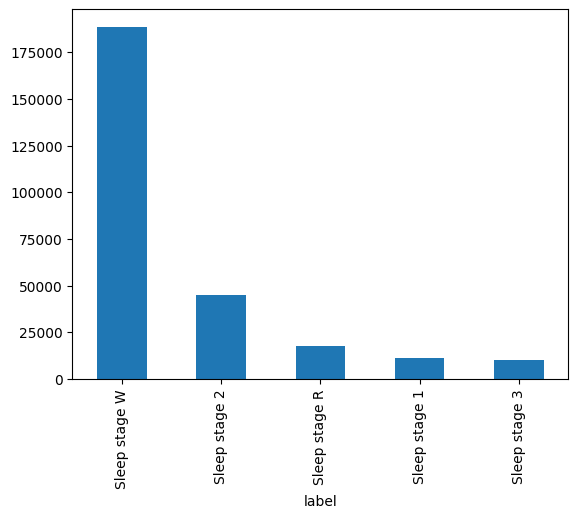

In [ ]:
df_feats["label"].value_counts().plot(kind="bar")

<Axes: xlabel='label'>

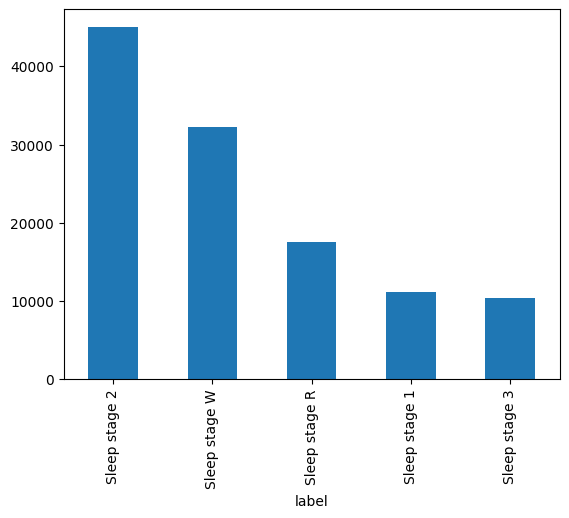

In [ ]:
df_feats_trimmed_all["label"].value_counts().plot(kind="bar")

### Space Visualization

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

feat_cols = [c for c in df_feats_trimmed_all.columns if c not in ["label", "psg_file", "patient_id"]]

#### PCA

(116216, 2)


c:\Users\ahmat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



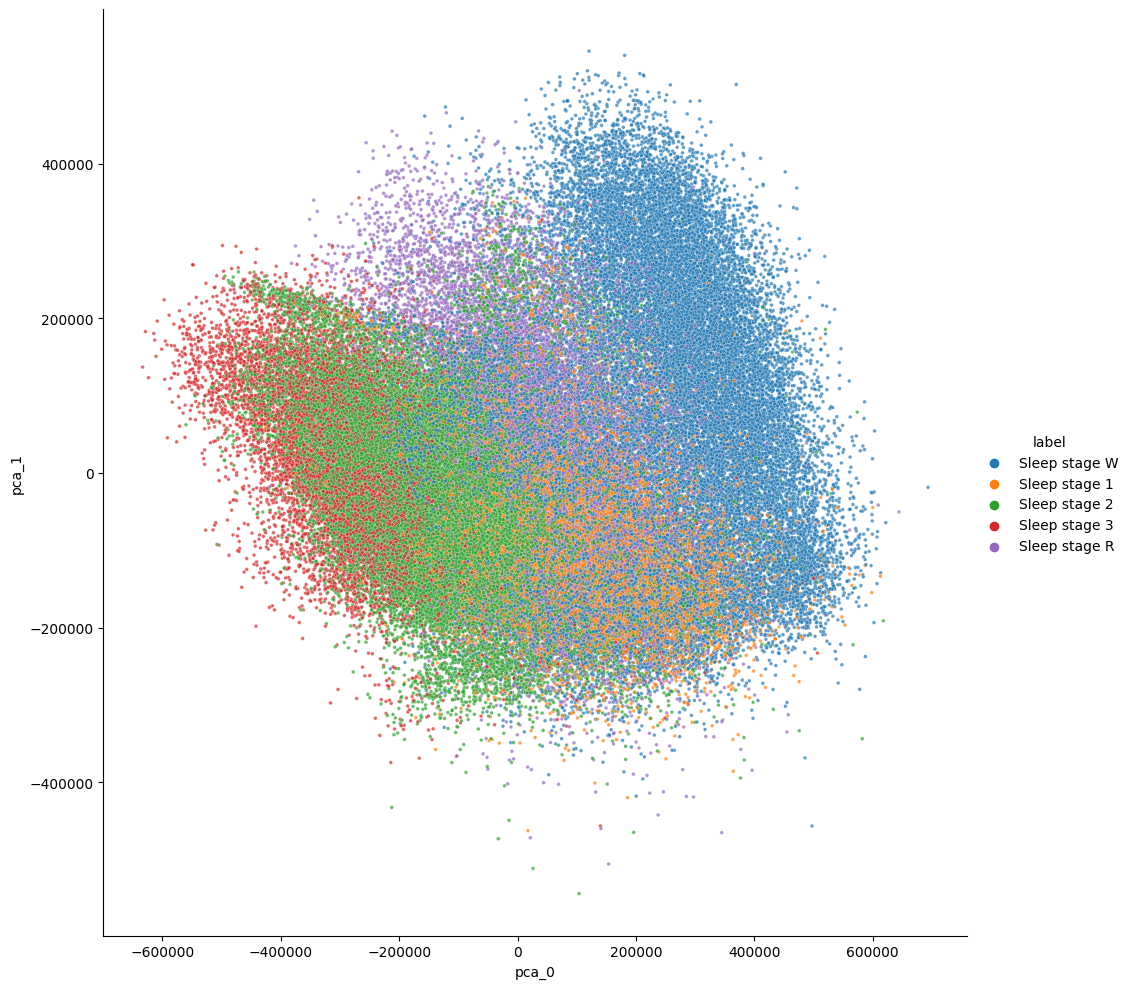

In [ ]:
n_components = 2
pca = PCA(n_components)
pca_result = pca.fit_transform(SimpleImputer().fit_transform(df_feats_trimmed_all[feat_cols]))
print(pca_result.shape)

label_col = "label"
pca_result = pd.DataFrame(pca_result).add_prefix("pca_")
pca_result[label_col] = df_feats_trimmed_all[label_col].values

labels = ["Sleep stage W"] + [f"Sleep stage {i}" for i in range(1,4)] + ["Sleep stage R"] 
sns.relplot(
    data=pca_result,
    x="pca_0",
    y="pca_1",
    hue=label_col,
    hue_order=labels,
    height=10,
    kind="scatter",
    s=7,
    alpha=0.7
)

#### t-SNE

(50000, 2)


c:\Users\ahmat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



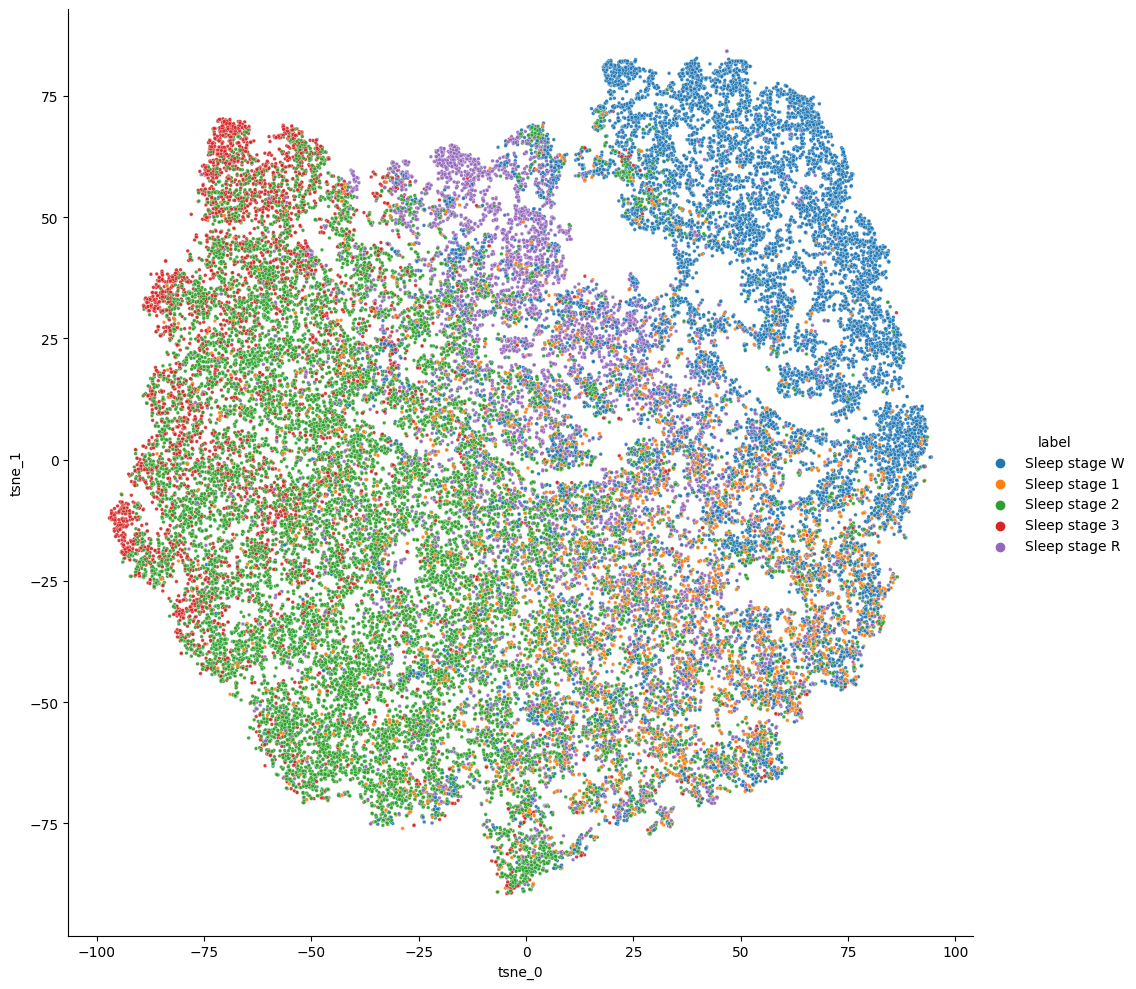

In [ ]:
n_components = 2
sample = df_feats_trimmed_all.sample(50_000)  # sample 50k rows

tsne = TSNE(n_components, perplexity=50, n_jobs=30, init='pca', learning_rate='auto')
tsne_result = tsne.fit_transform(SimpleImputer().fit_transform(sample[feat_cols]))
print(tsne_result.shape)

label_col = "label"
tsne_result = pd.DataFrame(tsne_result).add_prefix("tsne_")
tsne_result[label_col] = sample[label_col].values

labels = ["Sleep stage W"] + [f"Sleep stage {i}" for i in range(1,4)] + ["Sleep stage R"] 
sns.relplot(
    data=tsne_result,
    x="tsne_0",
    y="tsne_1",
    hue=label_col,
    hue_order=labels,
    height=10,
    kind="scatter",
    s=7,
    alpha=0.9
)

# ML model

In [ ]:
# Subset of data that does not contain the SC-EDF-10 patients
df_feats_trimmed = df_feats_trimmed_all[~df_feats_trimmed_all.psg_file.isin(df_feats_trimmed_paper.psg_file.unique())]
df_feats_trimmed.shape

(95216, 1051)

In [ ]:
# Label stats for the SC-EDF-50 \ SC-EDF10 data
df_feats_trimmed["label"].value_counts()

label
Sleep stage 2    36089
Sleep stage W    28594
Sleep stage R    13792
Sleep stage 1     9440
Sleep stage 3     7301
Name: count, dtype: int64

In [ ]:
# Label stats for the SC-EDF-10 data
print(len(df_feats_trimmed_paper))
df_feats_trimmed_paper["label"].value_counts()

21000


label
Sleep stage 2    8927
Sleep stage R    3693
Sleep stage W    3617
Sleep stage 3    3074
Sleep stage 1    1689
Name: count, dtype: int64

In [ ]:
# Label stats for the SC-EDF-50 data
print(len(df_feats_trimmed_all))
df_feats_trimmed_all["label"].value_counts()

116216


label
Sleep stage 2    45016
Sleep stage W    32211
Sleep stage R    17485
Sleep stage 1    11129
Sleep stage 3    10375
Name: count, dtype: int64

### Nan features

In [ ]:
no_shift_cols = [c for c in df_feats_trimmed_all.columns if not "shift=" in c]# or "w=1m" in c or "w=1m30s" in c]
len(no_shift_cols)

265

In [ ]:
normal_nan_mask = (df_feats_trimmed_all[no_shift_cols].isna().sum() / df_feats_trimmed_all.psg_file.nunique()).isin([0, 1, 2])
df_feats_trimmed_all[np.array(no_shift_cols)[~normal_nan_mask]].isna().sum().sort_values()[::-1]

EMG submental__wrapped_higuchi_fd__w=30s                        44
EMG submental__skew__w=30s                                      44
EMG submental__kurtosis__w=30s                                  44
EMG submental__hjorth_complexity__w=30s                         44
EMG submental__fft_aggregated_{'aggtype': 'skew'}__w=30s        44
EMG submental__fft_aggregated_{'aggtype': 'kurtosis'}__w=30s    44
EMG submental__horth_mobility__w=30s                             9
EMG submental__fourier_entropy_{'bins': 60}__w=30s               9
EMG submental__fourier_entropy_{'bins': 5}__w=30s                9
EMG submental__fourier_entropy_{'bins': 3}__w=30s                9
EMG submental__fourier_entropy_{'bins': 30}__w=30s               9
EMG submental__fourier_entropy_{'bins': 2}__w=30s                9
EMG submental__fourier_entropy_{'bins': 10}__w=30s               9
EMG submental__fourier_entropy_{'bins': 100}__w=30s              9
dtype: int64

In [ ]:
df_feats_trimmed_all["psg_file"][df_feats_trimmed_all[np.array(no_shift_cols)[~normal_nan_mask]].isna().any(axis=1)].value_counts()

psg_file
SC4332F0-PSG.edf    44
Name: count, dtype: int64

In [ ]:
df_feats_trimmed_all[np.array(no_shift_cols)[~normal_nan_mask]].isna().any(axis=1).sum() / len(df_feats_trimmed_all)

0.00037860535554484754

## Simple Linear Pipeline for the ML model

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    classification_report,
    f1_score,
    cohen_kappa_score,
    log_loss,
)
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import SGDClassifier

In [ ]:
%cd src
from visualizations import plot_linear_classification_coefs
from visualizations import plot_learning_curve
from visualizations import plot_confusion_matrix
%cd ..

c:\Users\ahmat\Documents\_ITBA\5to\1er Cuatrimestre\Neuro\sleep-linear\src
c:\Users\ahmat\Documents\_ITBA\5to\1er Cuatrimestre\Neuro\sleep-linear


In [ ]:
### Create pipeline
pipe = Pipeline(
    [
        ("impute", SimpleImputer()),
        ("scale", QuantileTransformer(n_quantiles=100, subsample=200_000, random_state=0)),
        (
            "linear_model",
            SGDClassifier(
                loss="log_loss",
                average=True,
                class_weight="balanced",
                n_jobs=5,
                random_state=0,
            ),
        ),
    ]
)

In [ ]:
print(df_feats_trimmed.columns.tolist())
print(feat_cols)
missing_cols = [col for col in feat_cols if col not in df_feats_trimmed.columns]
len(missing_cols)
if missing_cols:
    feat_cols = [col for col in feat_cols if col in df_feats_trimmed.columns]
    print("Updated feature columns:", feat_cols)

Updated feature columns: ['EEG Fpz-Cz__TotalAbsPow__w=1m', 'EEG Fpz-Cz__TotalAbsPow__w=30s', 'EEG Fpz-Cz__alpha__w=1m', 'EEG Fpz-Cz__alpha__w=30s', 'EEG Fpz-Cz__beta__w=1m', 'EEG Fpz-Cz__beta__w=30s', "EEG Fpz-Cz__binned_entropy_{'max_bins': 10}__w=1m", "EEG Fpz-Cz__binned_entropy_{'max_bins': 10}__w=30s", "EEG Fpz-Cz__binned_entropy_{'max_bins': 30}__w=1m", "EEG Fpz-Cz__binned_entropy_{'max_bins': 30}__w=30s", "EEG Fpz-Cz__binned_entropy_{'max_bins': 5}__w=1m", "EEG Fpz-Cz__binned_entropy_{'max_bins': 5}__w=30s", "EEG Fpz-Cz__binned_entropy_{'max_bins': 60}__w=1m", "EEG Fpz-Cz__binned_entropy_{'max_bins': 60}__w=30s", 'EEG Fpz-Cz__fdelta__w=1m', 'EEG Fpz-Cz__fdelta__w=30s', "EEG Fpz-Cz__fft_aggregated_{'aggtype': 'centroid'}__w=1m", "EEG Fpz-Cz__fft_aggregated_{'aggtype': 'centroid'}__w=30s", "EEG Fpz-Cz__fft_aggregated_{'aggtype': 'kurtosis'}__w=1m", "EEG Fpz-Cz__fft_aggregated_{'aggtype': 'kurtosis'}__w=30s", "EEG Fpz-Cz__fft_aggregated_{'aggtype': 'skew'}__w=1m", "EEG Fpz-Cz__fft_a

In [ ]:
### Fit the pipeline
pipe.fit(df_feats_trimmed[feat_cols], df_feats_trimmed["label"])

Pipeline(steps=[('impute', SimpleImputer()),
                ('scale',
                 QuantileTransformer(n_quantiles=100, random_state=0,
                                     subsample=200000)),
                ('linear_model',
                 SGDClassifier(average=True, class_weight='balanced',
                               loss='log_loss', n_jobs=5, random_state=0))])

In [ ]:
print("Training data:")
preds = pipe.predict(df_feats_trimmed[feat_cols])
preds_proba = pipe.predict_proba(df_feats_trimmed[feat_cols])
print("Log loss:", log_loss(y_true=df_feats_trimmed["label"], y_pred=preds_proba))
print(classification_report(y_true=df_feats_trimmed["label"], y_pred=preds))

Training data:
Log loss: 0.4854333029189249
               precision    recall  f1-score   support

Sleep stage 1       0.48      0.47      0.48      9440
Sleep stage 2       0.87      0.83      0.85     36089
Sleep stage 3       0.73      0.89      0.80      7301
Sleep stage R       0.81      0.85      0.83     13792
Sleep stage W       0.93      0.91      0.92     28594

     accuracy                           0.83     95216
    macro avg       0.77      0.79      0.78     95216
 weighted avg       0.83      0.83      0.83     95216



In [ ]:
print("Testing data:")
preds = pipe.predict(df_feats_trimmed_paper[feat_cols])
preds_proba = pipe.predict_proba(df_feats_trimmed_paper[feat_cols])
print("Log loss:", log_loss(y_true=df_feats_trimmed_paper["label"], y_pred=preds_proba))
print(classification_report(y_true=df_feats_trimmed_paper["label"], y_pred=preds))

Testing data:
Log loss: 0.4385168937448232
               precision    recall  f1-score   support

Sleep stage 1       0.56      0.37      0.44      1689
Sleep stage 2       0.92      0.85      0.88      8927
Sleep stage 3       0.83      0.94      0.88      3074
Sleep stage R       0.78      0.91      0.84      3693
Sleep stage W       0.89      0.94      0.92      3617

     accuracy                           0.85     21000
    macro avg       0.80      0.80      0.79     21000
 weighted avg       0.85      0.85      0.84     21000



In [ ]:
print("F1 macro: ", f1_score(preds, df_feats_trimmed_paper["label"], average="macro"))
print("Bal. Acc: ", balanced_accuracy_score(preds, df_feats_trimmed_paper["label"]))
print("Kappa:    ", cohen_kappa_score(preds, df_feats_trimmed_paper["label"]))
print("Log loss :", log_loss(y_true=df_feats_trimmed_paper["label"], y_pred=preds_proba))
# Very bad metric, but appearantly many report it
print("Acc:      ", accuracy_score(preds, df_feats_trimmed_paper["label"]))

F1 macro:  0.7924339866371551
Bal. Acc:  0.7951192127963796
Kappa:     0.7970313829773988
Log loss : 0.4385168937448232
Acc:       0.8504761904761905


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

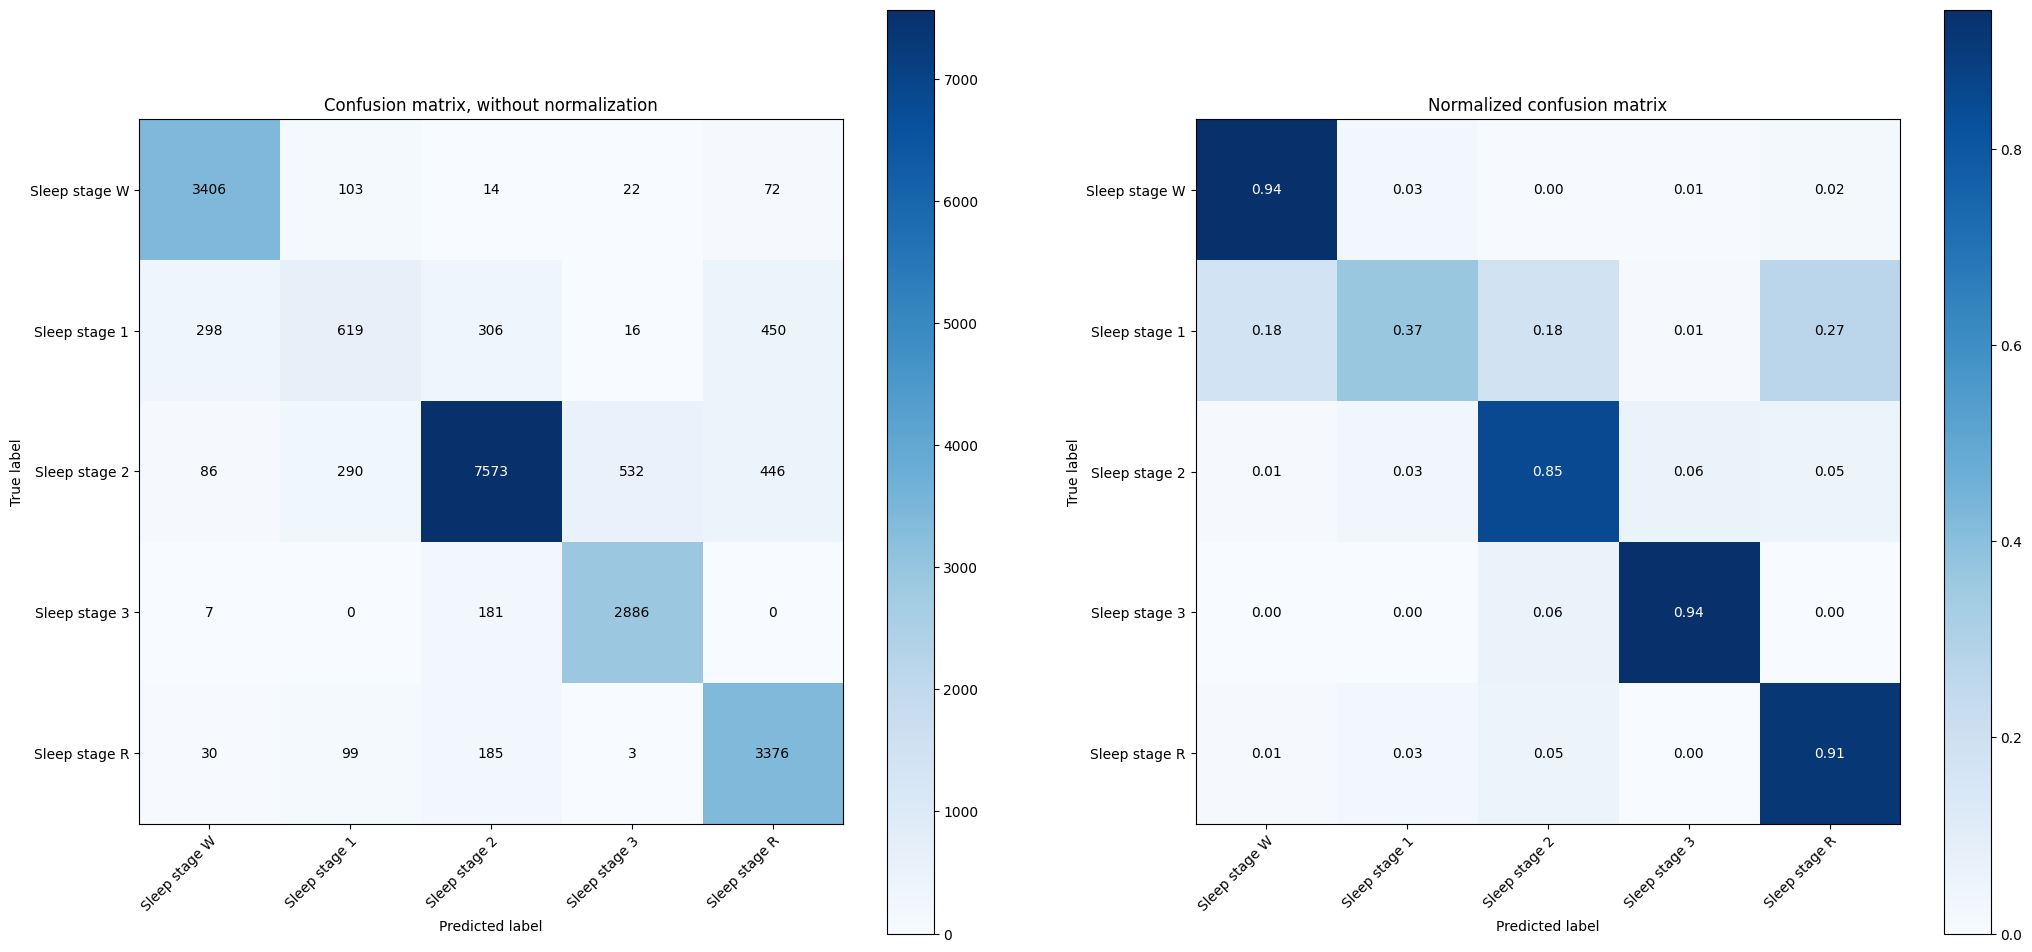

In [ ]:
classes = [
    'Sleep stage W',
    'Sleep stage 1',
    'Sleep stage 2',
    'Sleep stage 3',
    'Sleep stage R'
]

plt.figure(figsize=(25,12))
ax = plt.subplot(1,2,1)
plot_confusion_matrix(y_pred=preds, y_true=df_feats_trimmed_paper["label"], classes=classes, normalize=False, ax=ax)
ax = plt.subplot(1,2,2)
plot_confusion_matrix(y_pred=preds, y_true=df_feats_trimmed_paper["label"], classes=classes, normalize=True, ax=ax)

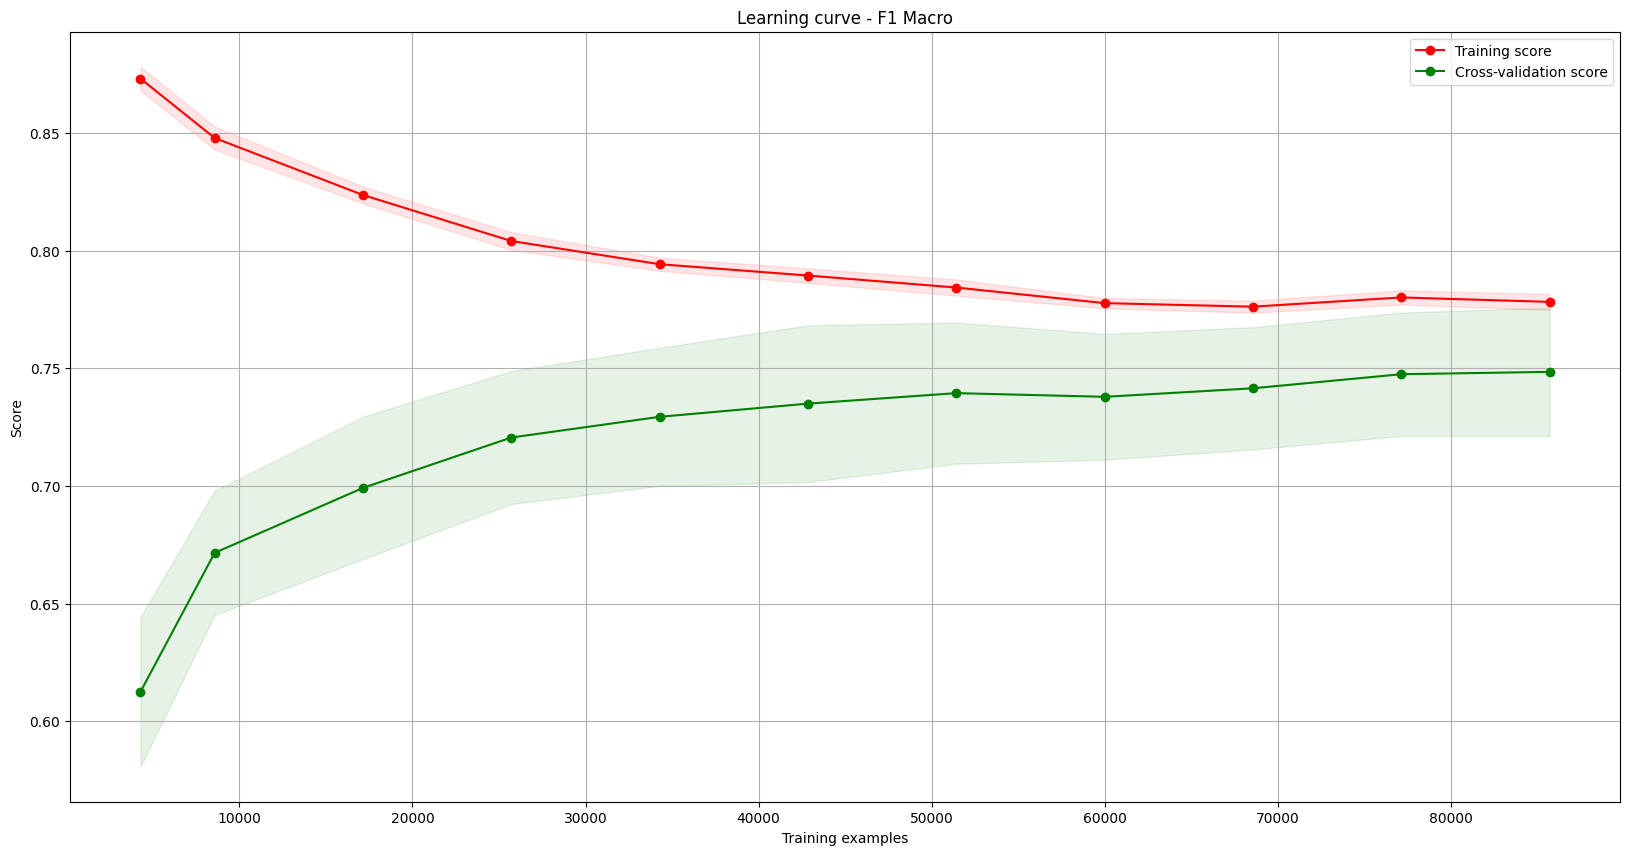

In [ ]:
cv = StratifiedGroupKFold(n_splits=10).split(
    df_feats_trimmed[feat_cols],
    df_feats_trimmed["label"],
    groups=df_feats_trimmed.patient_id,
)
_ = plot_learning_curve(
    pipe,
    title="Learning curve - F1 Macro",
    X=df_feats_trimmed[feat_cols],
    y=df_feats_trimmed["label"],
    cv=cv,
    scoring="f1_macro",
    n_jobs=25,
    train_sizes=[0.05] + list(np.linspace(0.1,1,10))
)